In [79]:
import seaborn as sns # gráficos + dataset IRIS
import matplotlib.pyplot as plt # gráficos

In [80]:
# carregando 
dados = sns.load_dataset('iris')

In [81]:
# visualização
dados.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
# ver se há dados faltantes
dados.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [83]:
# estatística descritiva
dados.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
# informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [85]:
# verificar a distribuição das classes
dados['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

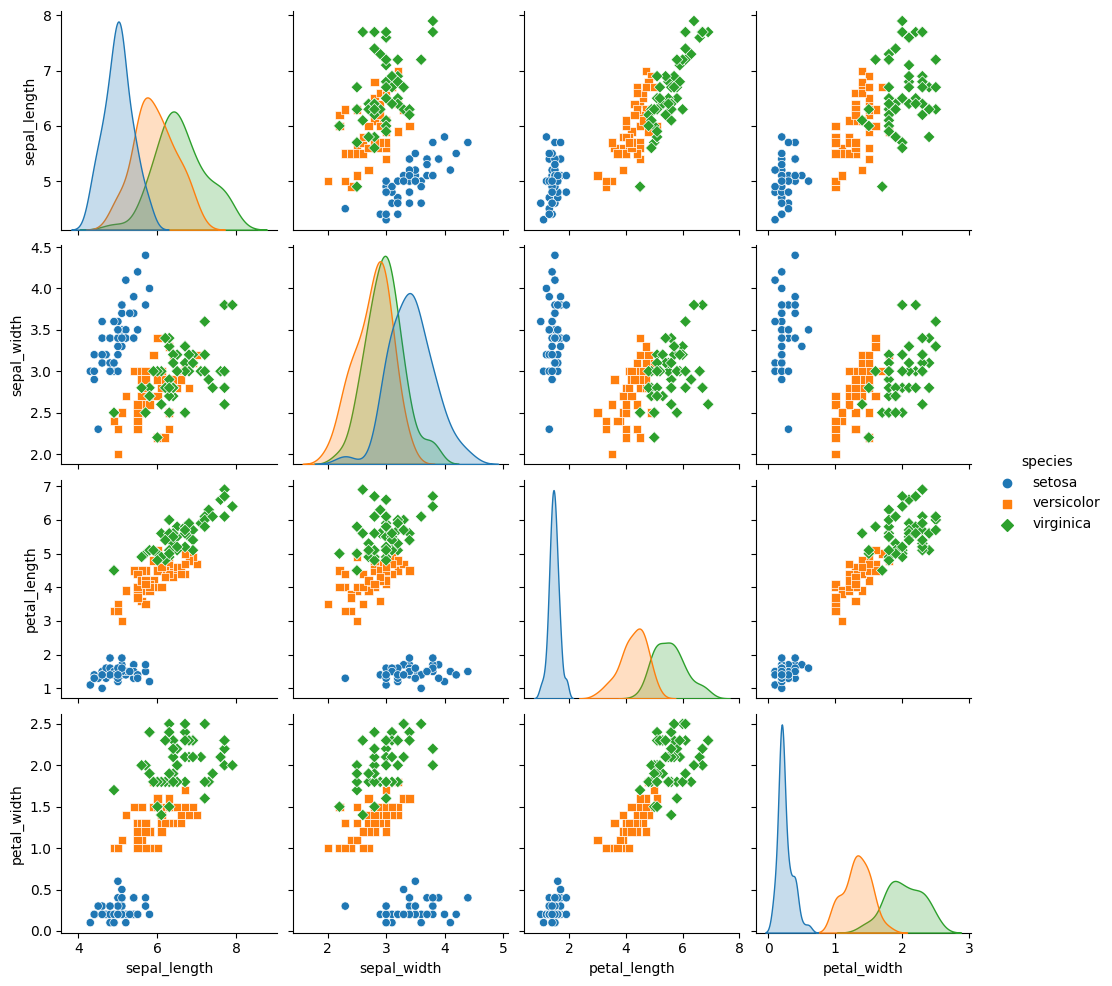

In [86]:
# relacionamentos em pares em um conjunto de dados.
sns.pairplot(dados, hue='species', markers=["o", "s", "D"])

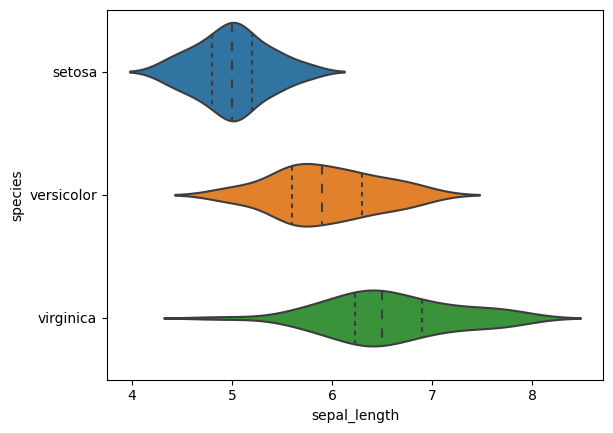

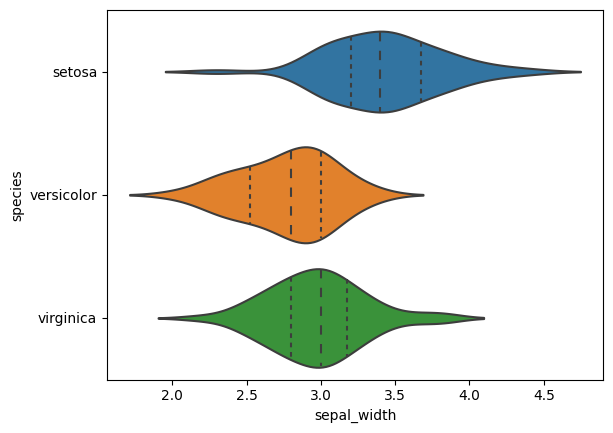

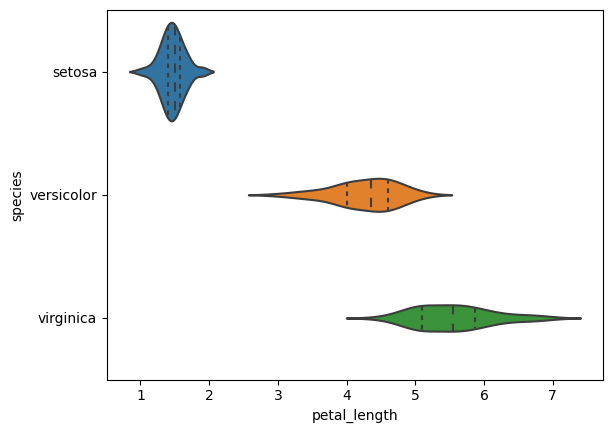

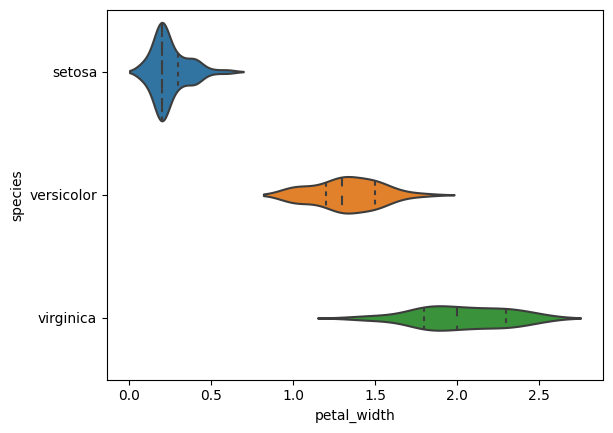

In [87]:
# boxplot (violino)
g = sns.violinplot(y='species', x='sepal_length', data=dados, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=dados, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=dados, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=dados, inner='quartile')
plt.show()

<AxesSubplot:title={'center':'Sepal (length VS width)'}, xlabel='sepal_length', ylabel='sepal_width'>

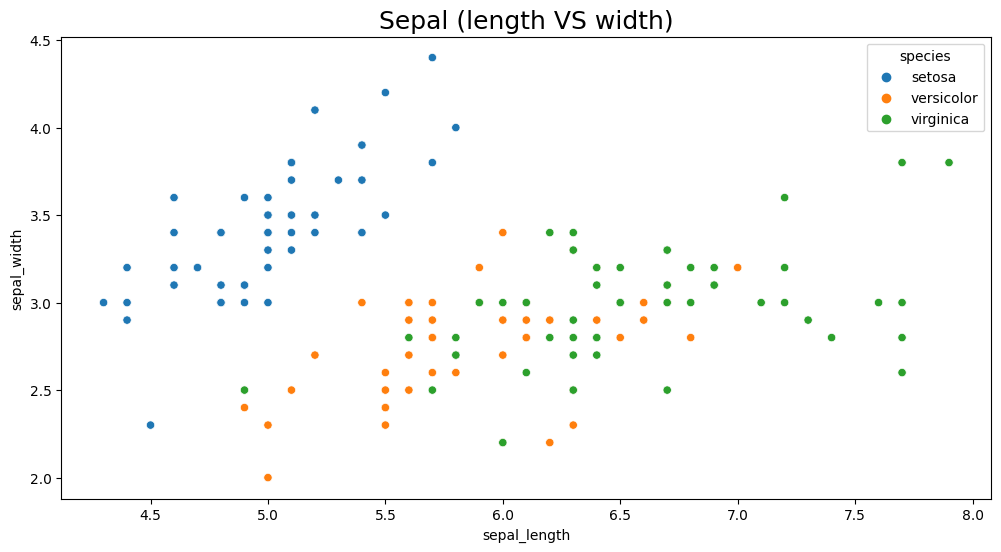

In [88]:
# gráfico de dispersão
ax = sns.scatterplot(x=dados['sepal_length'], y=dados['sepal_width'], hue=dados['species'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Sepal (length VS width)', fontsize=18)
ax

<AxesSubplot:title={'center':'Petal (length VS width)'}, xlabel='petal_length', ylabel='petal_width'>

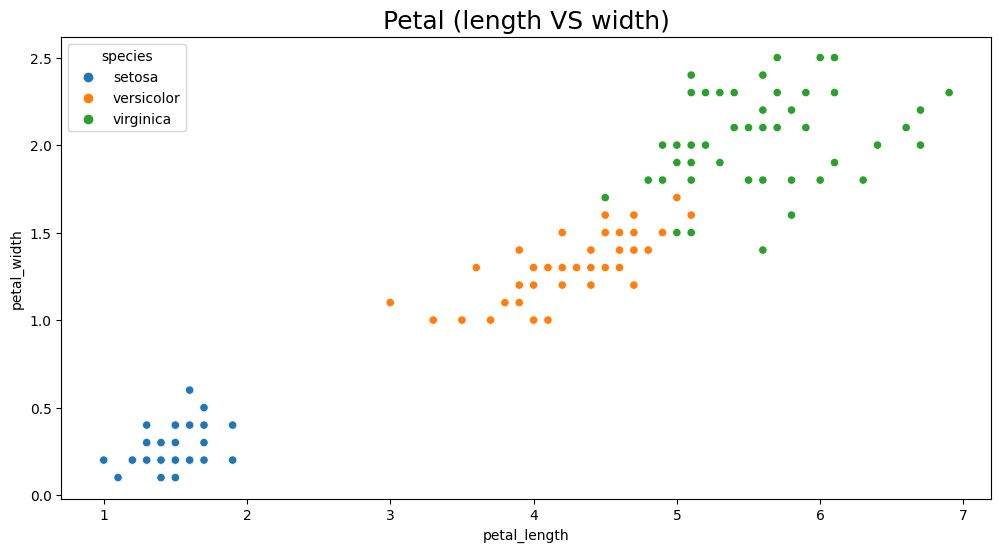

In [89]:
# gráfico de dispersão
ax = sns.scatterplot(x=dados['petal_length'], y=dados['petal_width'], hue=dados['species'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Petal (length VS width)', fontsize=18)
ax

## SVM

In [90]:
from sklearn import svm #Support Vector Machine
from sklearn.model_selection import train_test_split # separar os dados entre dados de treino e teste

In [91]:
# Separar os dados (X e Y)
X = dados.drop(['species'], axis=1)
y = dados.species

print('X = ' + str(X.shape) + '\n' + 'y = ' + str(y.shape))

X = (150, 4)
y = (150,)


In [92]:
# separar os dados entre dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=92)

In [93]:
# SVM regularization parameter
clf = svm.SVC(kernel='linear', C=1.0)

In [94]:
clf.fit(X_train, y_train) # modelar com os dados de treino

SVC(kernel='linear')

In [95]:
# prever
clf.predict(X_test)
y_pred = clf.predict(X_test)

In [96]:
clf.score(X_test,y_test) #acurácia

0.9777777777777777

In [97]:
from sklearn.metrics import classification_report # matriz de confusão

In [98]:
print(classification_report(y_test, y_pred)) # matriz de confusão

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.92      0.96        13
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

